<a href="https://colab.research.google.com/github/Seonghoon-Yu/ISLR-Python/blob/main/Chapter_4_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 - Classification(분류)

In [17]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

## 데이터셋 불러오기

In [3]:
# 깃허브를 클론합니다.
!git clone https://github.com/emredjan/ISL-python

Cloning into 'ISL-python'...
remote: Enumerating objects: 203, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 203 (delta 3), reused 0 (delta 0), pack-reused 194
Receiving objects: 100% (203/203), 16.94 MiB | 27.75 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [6]:
df = pd.read_csv('/content/ISL-python/datasets/Default.csv')

# factoriza()는 2개의 객체를 반환합니다.
# label array, 특정 값을 지닌 array
# 여기서는 label array에만 관심이 있습니다.
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(3)

,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,0,0


#### 설명 변수와 반응 변수 시각화
- 설명 변수: balance, income
- 반응 변수: default

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


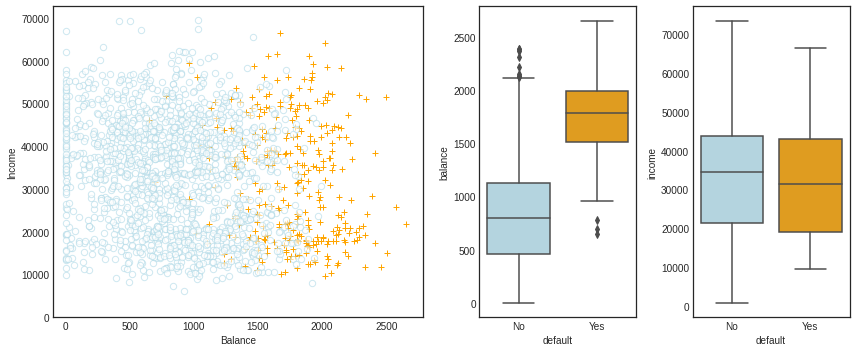

In [11]:
# 설명 변수: balance, income
# 반응 변수: default

fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1,4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# default = no인 sample 추출
df_no = df[df.default2 == 0].sample(frac=0.15)

# default = yse인 sample 추출
df_yes = df[df.default2==1]

df_ = df_no.append(df_yes)

# 산점도
ax1.scatter(df_[df_.default == 'Yes'].balance, df_[df_.default == 'Yes'].income, s=40, c='orange', marker='+', linewidth=1)
ax1.scatter(df_[df_.default == 'No'].balance, df_[df_.default == 'No'].income, s=40, marker='o', linewidths='1',
            edgecolors='lightblue', facecolors='white', alpha=.6)

ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')

# 박스 상자
c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot('default', 'balance', data=df, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('default', 'income', data=df, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())

## 4.3 Logistic Regression

#### linear regression vs logistic regression 비교
- 반응 변수가 범주형인 경우 logistic을 사용하면 출력값을 확률로 표현할 수 있습니다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


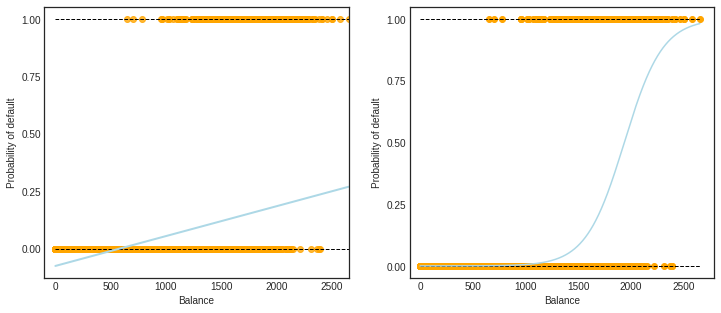

In [19]:
X_train = df.balance.values.reshape(-1,1)
y = df.default2

# test data 배열 생성
# classification 확률과 class 예측값을 계산
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg') # 로지스틱 회귀
clf.fit(X_train,y) # 계수 예측
prob = clf.predict_proba(X_test) # X_test에 대한 확률 계산

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))

# 왼쪽 plot, 선형 회귀
sns.regplot(df.balance, df.default2, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'lightblue', 'lw':2}, ax=ax1)

# 오른쪽 plot, 로지스틱 회귀
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1], color='lightblue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_xlim(xmin=-100)

#### 로지스틱 회귀 통계값
- 설명 변수: balance
- 반응 변수: default

In [20]:
y = df.default2

In [21]:
clf = skl_lm.LogisticRegression(solver='newton-cg') # 로지스틱 회귀 수행
X_train = df.balance.values.reshape(-1,1) # balance
clf.fit(X_train,y) # 계수 예측

print(clf)
print('classes: ', clf.classes_)
print('coefficients: ', clf.coef_)
print('intercept :',clf.intercept_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
classes:  [0 1]
coefficients:  [[0.00549891]]
intercept : [-10.65132573]


In [29]:
X_train = sm.add_constant(df.balance)
est = sm.Logit(y.ravel(), X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


#### 로지스틱 회귀 통계값
- 설명 변수: student
- 반응 변수: default

In [30]:
X_train = sm.add_constant(df.student2)
y = df.default2

est = sm.Logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-3.504128,0.070713,-49.554094,0.000000,-3.642723,-3.365532
student2,0.404887,0.115019,3.520177,0.000431,0.179454,0.630320


#### 다중 로지스틱 회귀
- 설명 변수: balance, income, student
- 반응 변수: default

In [33]:
X_train = sm.add_constant(df[['balance', 'income', 'student2']])
est = sm.Logit(y,X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
income,0.000003,0.000008,0.369808,7.115254e-01,-0.000013,0.000019
student2,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721


#### 교략(Confounding)

In [34]:
# student에 대한 balance와 default
X_train = df[df.student == 'Yes'].balance.values.reshape(df[df.student=='Yes'].balance.size,1)
y = df[df.student == 'Yes'].default2

# non-student에 대한 balance와 default
X_train2 = df[df.student == 'No'].balance.values.reshape(df[df.student == 'No'].balance.size,1) 
y2 = df[df.student == 'No'].default2

X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf2 = skl_lm.LogisticRegression(solver='newton-cg')

clf.fit(X_train,y)
clf2.fit(X_train2,y2)

prob = clf.predict_proba(X_test)
prob2 = clf2.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [36]:
df.groupby(['student', 'default']).size().unstack('default')

default,No,Yes
student,,
No,6850,206
Yes,2817,127


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


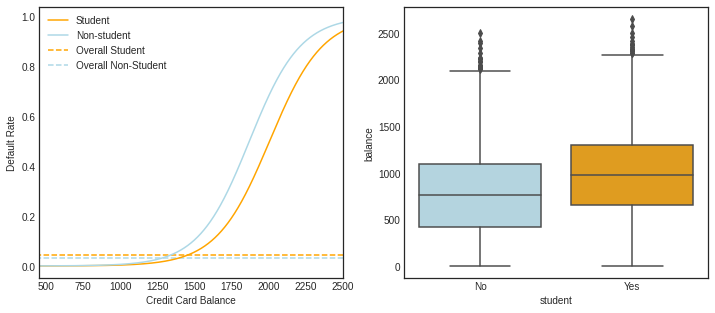

In [37]:
# 시각화
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

# 왼쪽 plot
ax1.plot(X_test, pd.DataFrame(prob)[1], color='orange', label='Student')
ax1.plot(X_test, pd.DataFrame(prob2)[1], color='lightblue', label='Non-student')
ax1.hlines(127/2817, colors='orange', label='Overall Student',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.hlines(206/6850, colors='lightblue', label='Overall Non-Student',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit Card Balance')
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
ax1.set_xlim(450,2500)
ax1.legend(loc=2)

# 오른쪽 plot
sns.boxplot('student', 'balance', data=df, orient='v', ax=ax2,  palette=c_palette);

## 4.4 선형 판별 분석(Linear Discriminant Analysis)
- 선형 판별 분석은 베이즈 분류기를 근사화하는 모델입니다.
- X의 분포를 가우시안으로 가정합니다.
- 사전 확률, 각 class에 해당하는 X의 평균, X의 분산을 추정하여 사후 확률을 계산합니다. 
- X의 분산은 모든 class에 대해 동일하다고 가정합니다.
- Y가 3개 이상인 경우 로지스틱 회귀 대신에 사용합니다.
- 결정 경계를 선형으로 예측합니다.
- X의 분포가 가우시안이 아닌 경우, 로지스틱 회귀의 성능이 더 뛰어납니다.

In [42]:
X = df[['balance', 'income', 'student2']]
y = df.default2

# 선형 판별 분석
lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X, y).predict(X)

df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,9645,254
Yes,22,79


In [43]:
print(classification_report(y, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.97      1.00      0.99      9667
         Yes       0.78      0.24      0.36       333

    accuracy                           0.97     10000
   macro avg       0.88      0.62      0.67     10000
weighted avg       0.97      0.97      0.97     10000



#### 사후 확률 임계값 낮추기
- 회사의 목적은 default를 판별하는 것이므로 default가 되는 사후 확률의 임계값을 낮춥니다.
- default error는 낮아지지만, non-default error는 높아집니다.

In [44]:
decision_prob = 0.2
y_prob = lda.fit(X, y).predict_proba(X)

df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_prob[:,1] > decision_prob})
df_.replace(to_replace={0:'No', 1:'Yes', 'True':'Yes', 'False':'No'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,9435,140
Yes,232,193


# Lab
## 4.6.3 선형 판별 분석
- 주식 데이터에 LDA를 수행합니다.

In [45]:
df = pd.read_csv('/content/ISL-python/datasets/Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)

In [47]:
X_train = df[:'2004'][['Lag1','Lag2']]
y_train = df[:'2004']['Direction']

X_test = df['2005':][['Lag1','Lag2']]
y_test = df['2005':]['Direction']

# 선형 판별 분석
lda = LinearDiscriminantAnalysis()

# 예측값
pred = lda.fit(X_train, y_train).predict(X_test)

In [48]:
# 사전 확률 추정값
lda.priors_

array([0.49198397, 0.50801603])

In [50]:
# X 분포의 평균 추정
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [51]:
# 계수 추정
lda.coef_

array([[-0.05544078, -0.0443452 ]])

In [52]:
# 교락 행렬
confusion_matrix(y_test, pred).T

array([[ 35,  35],
       [ 76, 106]])

In [53]:
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

        Down      0.500     0.315     0.387       111
          Up      0.582     0.752     0.656       141

    accuracy                          0.560       252
   macro avg      0.541     0.534     0.522       252
weighted avg      0.546     0.560     0.538       252



In [54]:
pred_p = lda.predict_proba(X_test) # X_test에 대해 예측 수행

In [55]:
np.unique(pred_p[:,1]>0.5, return_counts=True) # 사후 확률 임계값

(array([False,  True]), array([ 70, 182]))

In [57]:
np.unique(pred_p[:,1]>0.9, return_counts=True) # 사후 확률 임계값

(array([False]), array([252]))

## 4.6.4 이차 판별 분석
- 결정 경계를 비선형으로 예측합니다.
- X의 사전확률, 각 class에 대한 X의 평균과 분산을 추정하여 사후확률을 계산합니다.

In [59]:
# 이차 판별 분석
qda = QuadraticDiscriminantAnalysis()

# 예측 수행
pred = qda.fit(X_train, y_train).predict(X_test)

In [60]:
# 사전 확률 계산
qda.priors_

array([0.49198397, 0.50801603])

In [61]:
# 추정한 평균 출력
qda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [63]:
# 교락 행렬
confusion_matrix(y_test, pred).T

array([[ 30,  20],
       [ 81, 121]])

In [64]:
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

        Down      0.600     0.270     0.373       111
          Up      0.599     0.858     0.706       141

    accuracy                          0.599       252
   macro avg      0.600     0.564     0.539       252
weighted avg      0.599     0.599     0.559       252



## 4.6.5 K 최근접 이웃(K-Nearest Neighbors)
- 비 모수적 방법이며, 선택한 K에 따라 flexible의 정도를 결정합니다.
- 관측값과 가장 가까운 K개의 값을 선택하고, 선택한 값이 가장 많이 속해있는 class을 관측값에 할당합니다.

In [65]:
# K = 1
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[43 58]
 [68 83]]
              precision    recall  f1-score   support

        Down      0.426     0.387     0.406       111
          Up      0.550     0.589     0.568       141

    accuracy                          0.500       252
   macro avg      0.488     0.488     0.487       252
weighted avg      0.495     0.500     0.497       252



In [67]:
# K = 3
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
pred = knn.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[48 55]
 [63 86]]
              precision    recall  f1-score   support

        Down      0.466     0.432     0.449       111
          Up      0.577     0.610     0.593       141

    accuracy                          0.532       252
   macro avg      0.522     0.521     0.521       252
weighted avg      0.528     0.532     0.529       252

